In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [86]:
df1 = pd.read_excel("Data/Web_Teaser_Bewertung_01.xlsx")#, sheet_name=None)

In [87]:
df2 = pd.read_excel("Data/Web_Teaser_Bewertung_02.xlsx")#, sheet_name=None)

In [88]:
df3 = pd.read_excel("Data/Web_Teaser_Bewertung_02.xlsx")#, sheet_name=None)

In [89]:
dfs = [df1, df2, df3]

In [90]:
def split_input_target(df):
    header = df.iloc[0]
    df = df.rename(columns=df.iloc[0]).iloc[1:201].drop(columns="teaser_name")
    target_names = ["accent colour", "background colour", "font colour", "font contrast", "space", "roundness"]
    targets = df[target_names]
    inputs = df.drop(columns=target_names)
    inputs = inputs.astype(int)#.abs()
    return inputs, targets

In [91]:
inputs = []
targets = []
for df in dfs:
    input_df, target_df = split_input_target(df)
    inputs.append(input_df)
    targets.append(target_df)

In [92]:
inputs1, targets1 = split_input_target(df1)
inputs2, targets2 = split_input_target(df2)

## Check data integrity of target

In [93]:
(targets1 != targets2).sum()

accent colour        53
background colour     1
font colour           0
font contrast         0
space                 0
roundness             8
dtype: int64

In [94]:
mask = (targets1["accent colour"] != targets2["accent colour"])

In [95]:
#targets1[mask]

In [96]:
#targets2[mask]

## Show deviation of responses:

In [104]:
# Inpect data:
inputs[0]

,Innovative - Traditional,Elegant - Lassig,Emotional - Sachlich,Jung - Erfahren,Perfektionistisch - Spontan,zurückhalten - selbstsicher,Weiblich - Männlich
1,-9,7,-5,-9,7,-9,-3
2,-7,2,-5,-3,7,-7,2
3,-5,3,-7,-8,8,-7,3
4,3,-4,2,4,-1,-4,0
5,-2,-1,-3,-2,5,-3,-3
...,...,...,...,...,...,...,...
196,-2,-6,-2,5,5,-4,2
197,-8,7,-3,-6,7,-4,1
198,-5,6,1,-6,9,-9,4
199,-7,5,-6,-2,-4,-8,5


In [105]:
# Calculate mean
mean_input = inputs[0].copy()
for inp in inputs[1:]:
    mean_input += inp.copy()
mean_input /= len(inputs)

In [106]:
mean_input.mean()

Innovative - Traditional      -1.258333
Elegant - Lassig               1.416667
Emotional - Sachlich          -1.396667
Jung - Erfahren                0.060000
Perfektionistisch - Spontan    2.255000
zurückhalten - selbstsicher   -4.935000
Weiblich -  Männlich           0.791667
dtype: float64

In [107]:
# Calculate std:
std_input = (inputs[0].copy() - mean_input) ** 2
for inp in inputs[1:]:
    std_input += (inp.copy() - mean_input) ** 2
std_input /= len(inputs)
std_input = std_input ** 0.5

In [108]:
std_input.mean()

Innovative - Traditional       0.872098
Elegant - Lassig               0.749533
Emotional - Sachlich           0.810816
Jung - Erfahren                0.874455
Perfektionistisch - Spontan    0.655252
zurückhalten - selbstsicher    0.914525
Weiblich -  Männlich           1.091301
dtype: float64

Text(0.5, 1.0, 'Mean deviation of responses with standard deviation')

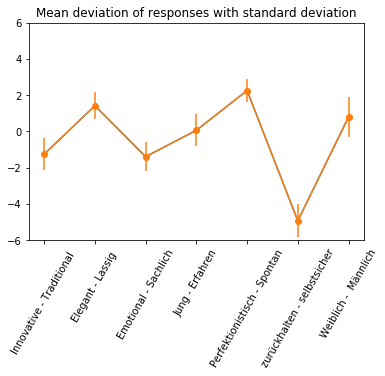

In [102]:
plt.plot(mean_input.mean())
plt.errorbar(range(len(mean_input.mean())), mean_input.mean(),yerr=std_input.mean(), fmt='-o')
plt.ylim(-6, 6)
plt.xticks(rotation=60)
plt.title("Mean deviation of responses with standard deviation")